#  **机器学习-CIFAR10的代码实现和可视化**

-------------------------------------------------------------------------

## **姜洋**

对于CIFAR10的代码实现和可视化，主要分为以下几个步骤

1.下载CIFAR10图集<p>
2.搭建神经网络进行训练<p>
3.调用损失函数和优化器<p>
4.循环训练<p>
5.绘制图表<p>

引用数据集链接：https://www.kaggle.com/datasets/pankrzysiu/cifar10-python/data

## **设置**

·首先，导入一些必要的模块，例如torch，matplotlib等来搭建神经网络和绘制图形

In [25]:
# 在Jupyter Notebook中使用matplotlib显示图形
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
# 导入神经网络模块
from torch import nn
from torch.utils.data import DataLoader
# 导入TensorBoard可视化模块
from torch.utils.tensorboard import SummaryWriter

这段代码是用来导入必要的Python库和模块，<p>
包括matplotlib用于绘图，<p>
torch用于深度学习，<p>
torchvision用于计算机视觉任务，<p>
nn用于定义神经网络模型，<p>
DataLoader用于加载数据集，<p>
SummaryWriter用于将训练过程中的数据写入TensorBoard进行可视化。

## **1.准备数据集**

### **1.1载CIFAR-10数据集**

In [26]:
train_data = torchvision.datasets.CIFAR10(root='../data', train=True, transform=torchvision.transforms.ToTensor(),
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='../data', train=False, transform=torchvision.transforms.ToTensor(),
                                         download=True)

Files already downloaded and verified
Files already downloaded and verified


从CIFAR10数据集中加载测试集，设置数据存储路径为'../data'，进行数据转换为Tensor类型<p>
若加载成功，则输出提示

### **1.2DataLoader加载数据集**

In [27]:
# DataLoader加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

train_dataloader：这个 DataLoader 实例是用来加载训练数据的。它从名为 train_data 的数据集中每次提取64个样本（例如图像或文本记录），作为一个小批量数据用于模型训练。这里默认没有显式设置 shuffle 参数，但通常在训练数据加载时应设置为 True 以获得更好的训练效果。
<p>

test_dataloader：这个 DataLoader 实例则是用于加载测试数据的，同样每次提取64个样本作为一个批次。对于测试数据，我们通常不进行随机打乱，以保持数据的原始分布特性，因此默认设置（不显式设置 shuffle 参数，默认为 False）是合适的。

## **2.搭建神经网络**

### **2.1搭建网络**

In [28]:
# 搭建神经网络
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 64),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x

这段代码定义了一个基于PyTorch的神经网络模型类，继承自nn.Module，用于处理图像分类任务，特别是针对像CIFAR-10这样的数据集。下面是对该模型结构的详细解析：<p>
初始化方法 (__init__)
在初始化方法中，模型通过nn.Sequential容器定义了一系列层，这意味着数据会依次通过这些层。这是一个典型的卷积神经网络（CNN）架构，适用于图像识别任务，包括以下组件：

卷积层 (nn.Con vd):

第一个nn.Conv2d(3, 32, 5, 1, 2)表示从3个输入通道（对应RGB图像）到32个输出通道的卷积，卷积核大小为5x5，步长(stride)为1，填充(padding)为2。填充可以在不减小输入尺寸的情况下应用卷积。
接下来的两个卷积层也遵循相似的模式，但第二个卷积层的输入通道数变为32，第三个变为64，以增加模型的深度和学习复杂特征的能力。
最大池化层 (nn.Maxool2d):

在每个卷积层之后紧接着一个最大池化层，池化窗口大小为2x2，这有助于缩小空间维度，减少计算量，同
时保持重要的特征信息。
展平层 ( n.Flatten):

经过一系列卷积和池化后，数据被展平成一维向量，准备送入全连接层。此处未直接指定展平后的尺寸，但根据前面的计算，假设输入图像尺寸为32x32，最终展平尺寸为64 * 4 * 4。
全连 
层 (nn.Linear):

展平后的数据首先通过一个拥有64个输出节点的全连接层，然后通过另一个具有10个输出节点的全连接层。10个输出对应CIFAR-10数据集中的10个类别。
前向传播 (forward)
forward方法定义了数据通过网络的流程。在这个例子中，非常简洁，仅需一行代码x = self.model(x)，因为所有层已经被组织在self.model中。模型接收输入x，经过各层的变换，最后返回模型的输出，即对输入图像的类别预测。

综上所述，这个模型是一个相对简单的CNN，适合处理像CIFAR-10这样的小型图像分类任务，通过卷积层提取特征，池化层降低空间维度，全连接层进行分类决策。

### **2.2创建网络模型***

In [29]:
# 创建网络模型
model = Model().cuda()

实例化神经网络模型并将其移动到GPU上

model = Model().cuda()：
这一行代码首先实例化了之前定义的Model类，创建了一个神经网络模型的实例。
然后，通过调用.cuda()方法，该模型被转移到CUDA支持的GPU上（如果可用）。
这一步骤对于加速训练过程特别重要，因为GPU相比CPU能更高效地执行大规模并行计算，这对于深度学习任务尤其有利。
如果GPU不可用，这段代码会抛出错误，此时需要取消.cuda()调用或者配置合适的环境。

## **3.调用损失函数和优化器**

In [30]:
# 损失函数
loss = nn.CrossEntropyLoss().cuda()

nn.CrossEntropyLoss: 这个损失函数实际上是两个操作的组合：nn.LogSoftmax和nn.NLLLoss(负对数似然损失)。它直接从原始概率分数（通常是模型输出，未经过softmax处理）计算交叉熵损失，非常适合网络的输出层直接输出类别概率预测的情况。

In [31]:
# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

torch.optim.SGD: 这是PyTorch中SGD优化器的类。SGD的基本思想是在每一次迭代中，根据损失函数关于模型参数的梯度来更新参数，从而逐步减小损失，达到优化模型的目的。SGD因其简单和有效性，在许多场景下都是首选的优化策略。

model.parameters(): 这个方法返回模型中所有可学习参数（权重和偏置）的迭代器。优化器需要知道哪些参数需要在训练过程中进行更新，model.parameters()就提供了这些参数的访问。

lr=0.01: 这里设置的学习率（learning rate，lr）为0.01。学习率决定了参数在梯度下降过程中的更新幅度，即每一步沿着梯度方向调整参数的步长。选择合适的学习率至关重要，因为它影响到模型收敛的速度和最终的性能。较大的学习率可能导致训练不稳定，难以收敛；而过小的学习率则可能使训练过程过于缓慢，甚至陷于局部最小值。

In [32]:
# 创建列表来存储准确度数值
train_loss_list = []
test_loss_list = []
train_accuracy_list = []
test_accuracy_list = []


创建列表来存储准确度数值

## **4.循环训练**

In [34]:
# 开始循环训练
for epoch in range(30):
    num_time = 0
    model.train()
    train_loss = 0
    train_accurate = 0
    for data in train_dataloader:
        imgs, targets = data
        imgs = imgs.cuda()
        targets = targets.cuda()
        output = model(imgs)
        loss_in = loss(output, targets)
        optimizer.zero_grad()
        loss_in.backward()
        optimizer.step()
        train_loss += loss_in.item()
        train_accurate += (output.argmax(1) == targets).sum()
        num_time += 1

    train_loss /= num_time
    train_accuracy = train_accurate.item() / len(train_data) * 100
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    model.eval()
    test_loss = 0
    test_accurate = 0
    with torch.no_grad():
        for data in test_dataloader:
            imgs, targets = data
            imgs = imgs.cuda()
            targets = targets.cuda()
            output = model(imgs)
            loss_in = loss(output, targets)
            test_loss += loss_in.item()
            test_accurate += (output.argmax(1) == targets).sum()

    test_loss /= len(test_dataloader)
    test_accuracy = test_accurate.item() / len(test_data) * 100
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)

    print('第{}轮测试集的正确率:{:.2f}%'.format(epoch + 1, test_accuracy))

    torch.save(model, 'C:/Users/Starfish/Desktop/work/save/model_{}.pth'.format(epoch + 1))
    print("第{}轮模型训练数据已保存".format(epoch + 1))

第1轮测试集的正确率:62.73%
第1轮模型训练数据已保存
第2轮测试集的正确率:63.24%
第2轮模型训练数据已保存
第3轮测试集的正确率:63.06%
第3轮模型训练数据已保存
第4轮测试集的正确率:63.23%
第4轮模型训练数据已保存
第5轮测试集的正确率:64.04%
第5轮模型训练数据已保存
第6轮测试集的正确率:64.45%
第6轮模型训练数据已保存
第7轮测试集的正确率:64.22%
第7轮模型训练数据已保存
第8轮测试集的正确率:64.63%
第8轮模型训练数据已保存
第9轮测试集的正确率:64.74%
第9轮模型训练数据已保存
第10轮测试集的正确率:64.55%
第10轮模型训练数据已保存
第11轮测试集的正确率:64.54%
第11轮模型训练数据已保存
第12轮测试集的正确率:64.89%
第12轮模型训练数据已保存
第13轮测试集的正确率:64.94%
第13轮模型训练数据已保存
第14轮测试集的正确率:65.08%
第14轮模型训练数据已保存
第15轮测试集的正确率:65.05%
第15轮模型训练数据已保存
第16轮测试集的正确率:65.16%
第16轮模型训练数据已保存
第17轮测试集的正确率:65.16%
第17轮模型训练数据已保存
第18轮测试集的正确率:65.23%
第18轮模型训练数据已保存
第19轮测试集的正确率:64.92%
第19轮模型训练数据已保存
第20轮测试集的正确率:64.50%
第20轮模型训练数据已保存
第21轮测试集的正确率:65.07%
第21轮模型训练数据已保存
第22轮测试集的正确率:64.55%
第22轮模型训练数据已保存
第23轮测试集的正确率:62.69%
第23轮模型训练数据已保存
第24轮测试集的正确率:64.58%
第24轮模型训练数据已保存
第25轮测试集的正确率:64.37%
第25轮模型训练数据已保存
第26轮测试集的正确率:64.31%
第26轮模型训练数据已保存
第27轮测试集的正确率:60.30%
第27轮模型训练数据已保存
第28轮测试集的正确率:64.57%
第28轮模型训练数据已保存
第29轮测试集的正确率:64.41%
第29轮模型训练数据已保存
第30轮测试集的正确率:62.59%
第30轮模型训练数据已保存


#### **代码解析**

训练循环
外层循环: for epoch in range(30) 定义了训练的总轮次（epochs），这里是30轮。

模型训练模式: model.train() 将模型设置为训练模式，这一步是必要的，因为某些层（如Dropout、BatchNorm等）在训练和评估模式下的行为不同。

遍历训练数据: 通过遍历train_dataloader，对每一批训练数据执行以下操作：

数据移到GPU：imgs = imgs.cuda(); targets = targets.cuda()。
前向传播：output = model(imgs)。
计算损失：loss_in = loss(output, targets)。
清零梯度：optimizer.zero_grad()，防止梯度累加。
反向传播：loss_in.backward()，计算梯度。
更新权重：optimizer.step()，根据梯度更新模型参数。
模型评估模式: model.eval() 将模型切换到评估模式，禁用训练时特有的操作，保证评估结果的准确性。

遍历测试数据: 使用with torch.no_grad():上下文管理器禁用梯度计算，减少内存消耗和计算开销，然后遍历test_dataloader进行评估。

计算测试损失累计和准确率：sum_loss += loss_in; accurate += (output.argmax(1) == targets).sum()。
计算整体准确率: 计算一轮结束后在测试集上的平均准确率，并打印结果。

模型保存: 每轮训练结束后，使用torch.save(model, '路径')保存模型到指定路径，文件名包含当前轮次。

日志关闭: 最后，writer.close()关闭TensorBoard的SummaryWriter，完成日志记录。

注意点
准确率计算: accuracy = accurate.item() / len(test_data) * 100，注意这里直接使用了len(test_data)来计算总数，实际上应该使用len(test_dataloader.dataset)，因为dataloader可能在最后一个batch中不足一个batch_size的数据，直接使用test_data长度可能导致准确率计算不精确。
变量定义: 代码中提及的epoch_list和accuracy_list用于记录每个epoch的信息，但它们在代码片段中未定义，需要在循环外部提前定义。
保存路径: 确保模型保存路径是存在的，否则会抛出异常。
以上就是该段代码的核心逻辑，涵盖了模型训练、验证、模型保存的关键步骤。

## **5.绘制图表**

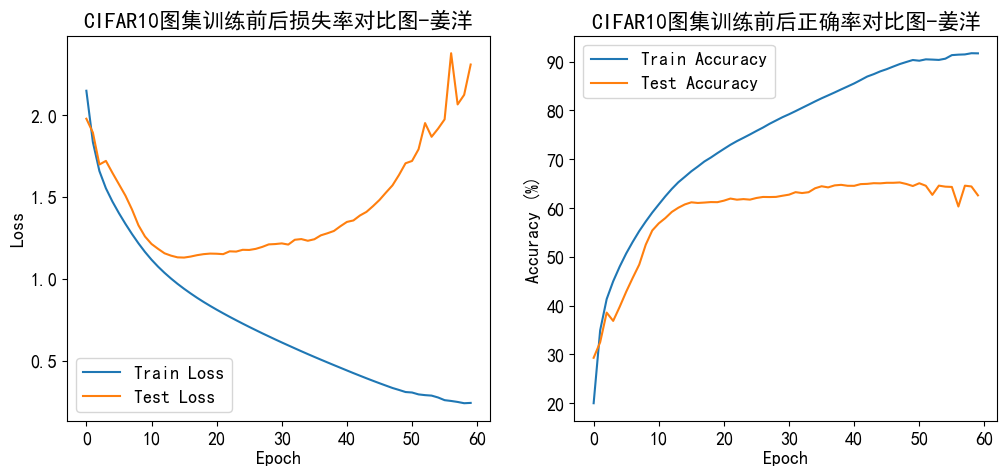

In [35]:
# Plotting the loss and accuracy
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
ax1.plot(train_loss_list, label='Train Loss')
ax1.plot(test_loss_list, label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('CIFAR10图集训练前后损失率对比图-姜洋')
ax1.legend()

# Plot the accuracy
ax2.plot(train_accuracy_list, label='Train Accuracy')
ax2.plot(test_accuracy_list, label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('CIFAR10图集训练前后正确率对比图-姜洋')
ax2.legend()

plt.show()